In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
features = df.iloc[:, :-1] #2D
target = df.iloc[:, -1]    #1D

In [4]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27


In [5]:
target

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

# Handling Missing Values with Simple Imputer

In [6]:
features["normalized-losses"].replace("?", np.nan, inplace=True)
features["horsepower"].replace("?", np.nan, inplace=True)

In [7]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean")
features[["normalized-losses", "horsepower"]] = si.fit_transform(features[["normalized-losses", "horsepower"]])

In [8]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


# Outliers Removal

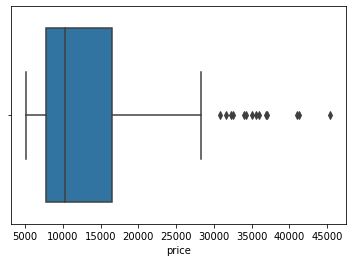

In [9]:
sns.boxplot(target)

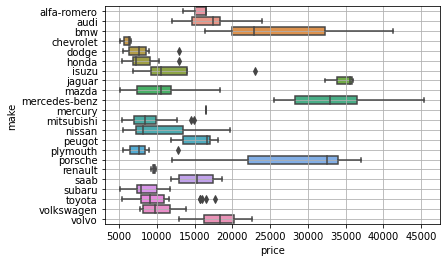

In [10]:
sns.boxplot(data=features, x=target, y="make")
plt.grid()

In [11]:
i = features[(features.make=="dodge")&(target>10000)].index
features.drop(i, axis=0, inplace=True)
target.drop(i, axis=0, inplace=True)

i = features[(features.make=="honda")&(target>12000)].index
features.drop(i, axis=0, inplace=True)
target.drop(i, axis=0, inplace=True)


i = features[(features.make=="isuzu")&(target>20000)].index
features.drop(i, axis=0, inplace=True)
target.drop(i, axis=0, inplace=True)


i = features[(features.make=="mitsubishi")&(target>13000)].index
features.drop(i, axis=0, inplace=True)
target.drop(i, axis=0, inplace=True)


i = features[(features.make=="plymouth")&(target>10000)].index
features.drop(i, axis=0, inplace=True)
target.drop(i, axis=0, inplace=True)


i = features[(features.make=="toyota")&(target>15000)].index
features.drop(i, axis=0, inplace=True)
target.drop(i, axis=0, inplace=True)

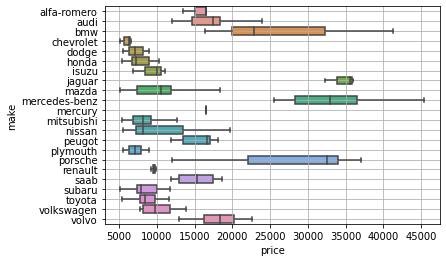

In [12]:
sns.boxplot(data=features, x=target, y="make")
plt.grid()

# Skewness removal

In [13]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [14]:
colname = features.select_dtypes(["int64", "float64"]).columns

In [15]:
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [16]:
from scipy.stats import skew

In [17]:
skew(features["normalized-losses"])

0.848205953606264

In [18]:
features[colname]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,64.1,48.8,130,111.0,21,27
1,3,122.0,64.1,48.8,130,111.0,21,27
2,1,122.0,65.5,52.4,152,154.0,19,26
3,2,164.0,66.2,54.3,109,102.0,24,30
4,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28
201,-1,95.0,68.8,55.5,141,160.0,19,25
202,-1,95.0,68.9,55.5,173,134.0,18,23
203,-1,95.0,68.9,55.5,145,106.0,26,27


symboling
0.21386866184357742


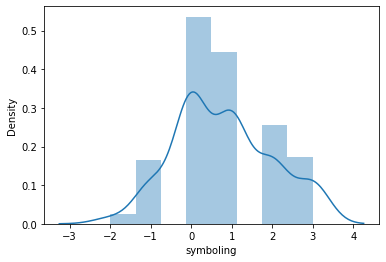

normalized-losses
0.848205953606264


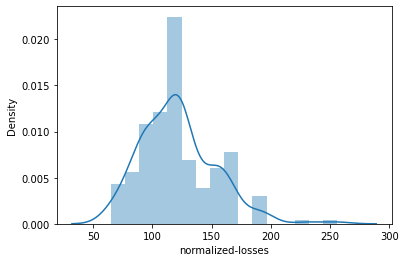

width
0.9140400320504322


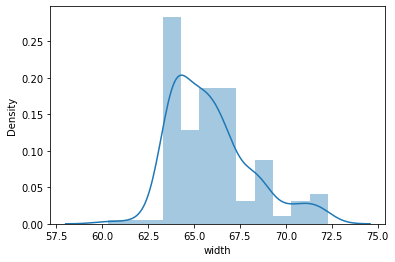

height
0.013839962443639326


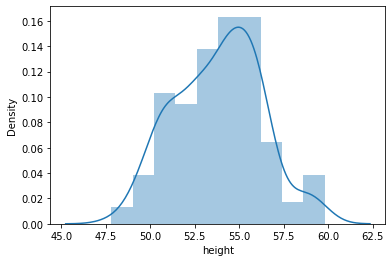

engine-size
2.0541257626466156


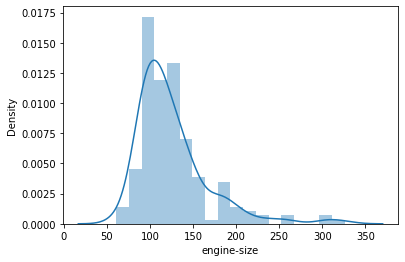

horsepower
1.5556576549504106


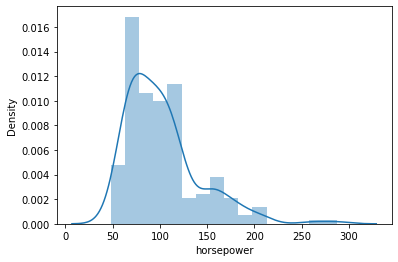

city-mpg
0.5999073033714895


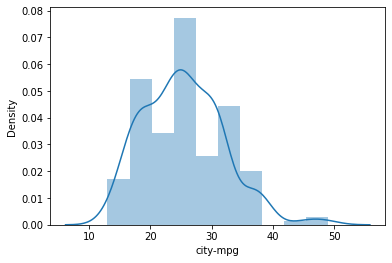

highway-mpg
0.4760310091695327


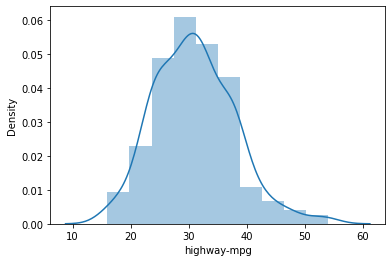

In [19]:
for col in features[colname]:
    print(col)
    print(skew(features[col]))
    
    plt.figure()
    sns.distplot(features[col])
    plt.show()

In [20]:
np.sqrt(25)

5.0

In [21]:
np.log(25)

3.2188758248682006

1. If the col which has skewness is showing good co-relation with target, do not remove the skewness
2. If the col which has skewness has some negative values, do not remove the skewness

In [22]:
pd.concat([features,target], axis=1).corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [23]:
pd.concat([features,target], axis=1).corr()["price"].sort_values()

highway-mpg         -0.704846
city-mpg            -0.680412
symboling           -0.095905
normalized-losses    0.129973
height               0.147010
width                0.730503
horsepower           0.768921
engine-size          0.869638
price                1.000000
Name: price, dtype: float64

In [24]:
np.log(-1)

nan

In [25]:
np.sqrt(-4)

nan

In [26]:
features["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 194, dtype: int64

In [27]:
skew(features["normalized-losses"])

0.848205953606264

In [28]:
n = 25
print(np.log(n))
print(np.sqrt(n))

3.2188758248682006
5.0


In [29]:
np.log(features["normalized-losses"])

0      4.804021
1      4.804021
2      4.804021
3      5.099866
4      5.099866
         ...   
200    4.553877
201    4.553877
202    4.553877
203    4.553877
204    4.553877
Name: normalized-losses, Length: 194, dtype: float64

In [30]:
features["normalized-losses"] = np.log(features["normalized-losses"])

In [31]:
skew(features["normalized-losses"])

0.018468899462087518

# Handling Categorical Data 

In [32]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [33]:
features["fuel-type"] #get_dummies, One Hot Encoding

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [34]:
pd.get_dummies(features["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [35]:
features["make"].nunique()

22

In [36]:
pd.get_dummies(features["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder()
ohe.fit_transform(features[["make"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Lebel Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
le.fit_transform(features["make"])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21])

In [41]:
#le.fit_transform(features[["make", "fuel-type"]])

# OrdinalEncoding

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [43]:
oe.fit_transform(features[["make", "fuel-type"]])

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,

1. OneHotEncoder -: it will increase the no of col as the no of categories the featues has.
2. LabelEncoder  -: it can be only implemented for y i.e target, not for x i.e features(one col at a time)
3. OridinalEncoder -: it can be used to encode the features

In [44]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [45]:
catcol = features.select_dtypes(object).columns

In [46]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
features[catcol] = oe.fit_transform(features[catcol])

In [47]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


# Data Scaling

In [48]:
n1 = 10#kg
n2 = 1000#gram

n1>n2

False

1. MinMaxScaler
2. StandardScaler

xnew = (x-min)/(max-min)

In [49]:
a = np.array([1,2,3,4,5])
b = np.array([10,20,30,40,50])
c = np.array([100,200,300,400,500])

In [50]:
def minmax(arr):
    xnew = (arr - arr.min())/(arr.max() - arr.min())
    return xnew

In [51]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [52]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [53]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Instead of writing this function, u can use predefined class of MinMaxScaler of sklearn. All the values in range 0 to 1.

In [54]:
#from sklearn.preprocessing import MinMaxScaler
#mn = MinMaxScaler()

In [55]:
#features.iloc[:, :]

In [56]:
#features.iloc[:, :] = mn.fit_transform(features.iloc[:,:])

In [57]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


Donot apply standardscaler after applying minmaxscaler.. Apply any one of them. Standard scaler gives value between -ve to +ve

xnew = x-xmean/std

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features.iloc[:, :] = sc.fit_transform(features.iloc[:, :])

In [59]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.846173,0.146152,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474
1,1.846173,0.146152,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474
2,0.176441,0.146152,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,1.315353,-0.982065,-0.726156
3,1.011307,1.315366,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-0.010980,-0.216307,-0.143429
4,1.011307,1.315366,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,0.320603,-1.135217,-1.308883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,0.295097,-0.369459,-0.434792
201,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.331576,0.687151,-0.078162,0.366605,1.468391,-0.982065,-0.871838
202,-1.493292,-0.842445,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,0.805225,-1.135217,-1.163201
203,-1.493292,-0.842445,1.413123,-2.949576,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.462006,0.091046,0.089996,-0.580474


# Feature Engineering

Creating new col.

In [60]:
features["Area"] = features["width"] * features["height"]

In [61]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
0,1.846173,0.146152,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474,1.688139
1,1.846173,0.146152,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474,1.688139
2,0.176441,0.146152,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,1.315353,-0.982065,-0.726156,0.104628
3,1.011307,1.315366,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-0.010980,-0.216307,-0.143429,0.027578
4,1.011307,1.315366,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,0.320603,-1.135217,-1.308883,0.045502


# Spliting the Data into Train & Test Set

Remember while droppping rows in X,remember to drop same in target variable Y too. Then both X and Y will have same no. of rows.

In [62]:
features.shape

(194, 15)

In [63]:
target.shape

(194,)

In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=1)
# the spliting of data is random.So we initialize it to some value,so that splitting values doesnot change. 

This is based on the concept of variable unpacking.

In [67]:
cat=["milk",2,"white"]
food,age,color=cat
print(food) 
print(age)
print(color)

milk
2
white


In [68]:
def traintestsplit():
  return [["xtrain"],["xtest"],["ytrain"],["ytest"]]

xtrain,xtest,ytrain,ytest=traintestsplit()
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)

['xtrain']
['xtest']
['ytrain']
['ytest']


In [65]:
xtrain

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
117,-0.658425,1.242402,0.138026,0.339032,0.432341,1.234608,-0.125327,1.102604,0.891924,-1.089059,0.199653,1.009276,-1.135217,-1.017519,0.983439
119,0.176441,0.047754,0.297413,0.339032,-0.748984,-0.566249,-0.125327,-0.958140,-1.237716,-0.078162,-0.658954,-0.010980,-0.216307,-0.143429,1.185905
174,-1.493292,-2.342230,1.094349,-2.949576,0.432341,-0.566249,-0.125327,0.278307,0.441423,-0.078162,-0.372752,-0.750665,0.702603,0.293616,0.122851
72,1.846173,0.746106,-0.499523,0.339032,-3.111634,1.234608,-0.125327,2.110079,-1.237716,1.943631,2.584675,1.340859,-1.441520,-1.891610,-2.611679
158,-0.658425,-1.012455,1.094349,-2.949576,0.432341,-0.566249,-0.125327,-0.683374,-0.336714,-0.078162,-0.372752,-1.184274,1.315209,0.730661,0.230102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.011307,-1.376124,0.934962,0.339032,-0.748984,-0.566249,-0.125327,-1.049729,-0.050032,0.932735,-0.420452,-0.750665,0.089996,0.002253,0.052520
143,-0.658425,-0.561466,0.934962,0.339032,0.432341,-0.566249,-0.125327,-0.225431,-0.541487,0.932735,-0.420452,-0.215031,0.089996,0.147935,0.122068
75,0.176441,0.146152,-0.340135,0.339032,-0.748984,1.234608,-0.125327,0.965221,0.400468,-0.078162,0.342755,1.850987,-0.982065,-1.017519,0.386541
146,-0.658425,-1.100283,0.934962,0.339032,1.613665,-0.566249,-0.125327,-0.225431,-0.336714,0.932735,-0.420452,-0.521108,0.396300,0.147935,0.075906
